In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [5]:
df=pd.read_csv('/content/airline_review.csv')

In [6]:
df.shape

(38111, 17)

In [7]:
df.sample(10)

,Unnamed: 0,Reviewer Names,Review Date,Review Text,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Value For Money,Wifi & Connectivity,Recommended
13956,13956,M Chan,2017-02-14,✅ Verified Review | Zurich to Hong Kong. Thei...,Boeing 777-300,Couple Leisure,Business Class,Zurich to Hong Kong,December 2016,5.0,5.0,5.0,5.0,4.0,5.0,NaN,yes
21211,21211,S Keelty,2018-03-31,✅ Trip Verified | Ft Myers to La Guardia. Fle...,A320,Solo Leisure,Economy Class,Ft Myers to La Guardia,March 2018,5.0,5.0,4.0,4.0,5.0,3.0,5.0,yes
20555,20555,Terry Beck,2020-01-13,Not Verified | I struggled to maintain my Dia...,Couple Leisure,Couple Leisure,Premium Economy,Salt Lake City to New York City,January 2020,2.0,2.0,3.0,3.0,2.0,3.0,2.0,no
36472,36472,C James,2017-08-24,"✅ Verified Review | Just a quick review, sinc...",Solo Leisure,Solo Leisure,Economy Class,Boston to Portland OR via Chicago,August 2017,5.0,5.0,5.0,5.0,4.0,NaN,NaN,yes
15849,15849,D Lobo,2015-05-25,Just done a trip from Sydney to New York on QF...,Business Class,NaN,Business Class,NaN,NaN,5.0,5.0,4.0,5.0,4.0,NaN,NaN,yes
2050,2050,Andrzej Olszewski,2017-01-20,✅ Verified Review | British Airways is a very ...,Solo Leisure,Solo Leisure,Economy Class,BKK to LHR,January 2017,5.0,5.0,5.0,5.0,5.0,5.0,5.0,yes
19490,19490,Latoya Hooper,2023-08-05,Not Verified | My husband and i had to run th...,Couple Leisure,Couple Leisure,Economy Class,Atlanta to Harrisburg,August 2023,1.0,1.0,2.0,1.0,1.0,NaN,NaN,no
11446,11446,Richard Johnson,2014-10-05,From Frankfurt Germany to JFK. A380 had a grea...,Economy Class,NaN,Economy Class,NaN,NaN,5.0,5.0,5.0,5.0,5.0,NaN,NaN,yes
18265,18265,Francois Guerrero,2016-02-26,Dammam to Marseille via Istanbul. Onboard serv...,Boeing 737-800,Business,Economy Class,DMM to MRS via IST,February 2016,3.0,3.0,3.0,4.0,1.0,2.0,NaN,no
31928,31928,C Birbeck,2012-08-23,Outbound MAN-OSL-TOS. Return TOS-OSL-CPH-MAN. ...,Economy Class,NaN,Economy Class,NaN,NaN,4.0,4.0,3.0,0.0,4.0,NaN,NaN,yes


### Formating Column Names

In [8]:
df.columns=df.columns.str.lower()

In [9]:
df.columns=df.columns.str.replace(' ', '_')

In [10]:
df.columns

Index(['unnamed:_0', 'reviewer_names', 'review_date', 'review_text',
       'aircraft', 'type_of_traveller', 'seat_type', 'route', 'date_flown',
       'seat_comfort', 'cabin_staff_service', 'food_&_beverages',
       'inflight_entertainment', 'ground_service', 'value_for_money',
       'wifi_&_connectivity', 'recommended'],
      dtype='object')

In [11]:
import matplotlib.pyplot as plt
import seaborn as sb

### Checking Missing Values

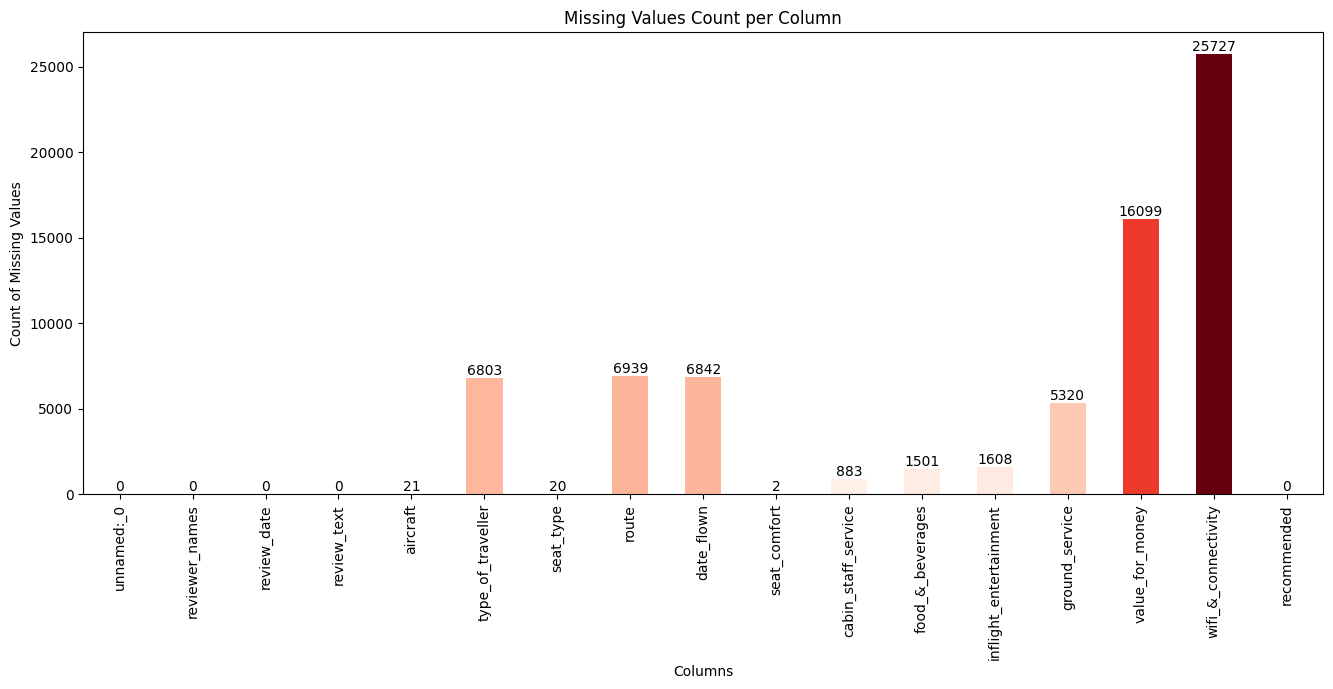

In [12]:
na_counts = df.isna().sum()

# Create a larger figure
plt.figure(figsize=(16, 6))

# Normalize the counts for coloring
norm = plt.Normalize(na_counts.min(), na_counts.max())
colors = plt.cm.Reds(norm(na_counts))

# Create the bar plot with the specified colors
ax = na_counts.plot(kind='bar', color=colors)

# Add labels to each bar
for i, count in enumerate(na_counts):
    ax.text(i, count, str(count), ha='center', va='bottom')

# Show the plot
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.title('Missing Values Count per Column')
plt.show()

In [13]:
df=df.dropna()

In [14]:
df.isna().sum()

,0
unnamed:_0,0
reviewer_names,0
review_date,0
review_text,0
aircraft,0
type_of_traveller,0
seat_type,0
route,0
date_flown,0
seat_comfort,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12330 entries, 0 to 37577
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   unnamed:_0              12330 non-null  int64  
 1   reviewer_names          12330 non-null  object 
 2   review_date             12330 non-null  object 
 3   review_text             12330 non-null  object 
 4   aircraft                12330 non-null  object 
 5   type_of_traveller       12330 non-null  object 
 6   seat_type               12330 non-null  object 
 7   route                   12330 non-null  object 
 8   date_flown              12330 non-null  object 
 9   seat_comfort            12330 non-null  float64
 10  cabin_staff_service     12330 non-null  float64
 11  food_&_beverages        12330 non-null  float64
 12  inflight_entertainment  12330 non-null  float64
 13  ground_service          12330 non-null  float64
 14  value_for_money         12330 non-null

# Labelling The Sentiment

######## To label our data, we will use both TextBlob and VaderSentiment. The rationale for employing both methods is to account for potential discrepancies in sentiment analysis. By considering only those reviews that yield consistent results from both approaches, we can reduce error and enhance the reliability of our labeling process.

### Using TextBlob For Labelling
***

> Add blockquote



In [16]:
from textblob import TextBlob
def textblob_sentiment(text):
    analysis = TextBlob(text)
    # TextBlob returns polarity, where > 0 is positive, < 0 is negative, and 0 is neutral
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

In [17]:
df['textblob_sentiment'] = df['review_text'].apply(textblob_sentiment)

In [18]:
df.sample(10)

,unnamed:_0,reviewer_names,review_date,review_text,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_&_beverages,inflight_entertainment,ground_service,value_for_money,wifi_&_connectivity,recommended,textblob_sentiment
23764,23764,K Brandy,2021-06-28,✅ Trip Verified | The staff are horrible! Not...,Family Leisure,Family Leisure,Economy Class,Denver to Tampa,June 2021,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,positive
20771,20771,Christy Lacy,2019-06-09,✅ Trip Verified | Las Vegas to Orlando via At...,Couple Leisure,Couple Leisure,First Class,Las Vegas to Orlando,June 2019,2.0,2.0,2.0,2.0,1.0,2.0,1.0,no,positive
14974,14974,Carol Charlesworth,2019-08-09,Not Verified | Sydney to Perth. I think Qanta...,Solo Leisure,Solo Leisure,Economy Class,Sydney to Perth,July 2019,2.0,3.0,1.0,1.0,3.0,4.0,2.0,no,negative
7283,7283,Christopher Walker,2019-07-31,✅ Trip Verified | My wife and I flew Business...,A380 /787/A330,Couple Leisure,Business Class,Sydney to Venice via Doha,May 2019,5.0,5.0,5.0,5.0,5.0,5.0,5.0,yes,positive
13930,13930,Jeff Michel,2017-06-05,✅ Verified Review | Geneva to New York. Board...,A330-300,Business,Business Class,Geneva to New York,March 2017,5.0,5.0,5.0,4.0,5.0,3.0,4.0,yes,positive
37135,37135,Lynne Carlson,2016-02-19,"In the past, American Airlines has been fine. ...",Solo Leisure,Solo Leisure,Economy Class,JAX to MKE via CLT,February 2016,2.0,1.0,2.0,1.0,1.0,1.0,1.0,no,negative
33279,33279,BG Declouet,2022-04-07,✅ Trip Verified | The absolute worst experienc...,Couple Leisure,Couple Leisure,Premium Economy,Dallas Fort-Worth to Barcelona via Madrid,February 2022,2.0,5.0,3.0,4.0,1.0,3.0,1.0,no,negative
24274,24274,J Carr,2019-09-06,Not Verified | Hawaii to San Francisco. Nickle...,Couple Leisure,Couple Leisure,Economy Class,Hawaii to San Francisco,September 2019,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,positive
19994,19994,M Nelson,2022-05-08,✅ Trip Verified | New York to Indianapolis. Th...,Business,Business,Premium Economy,New York to Indianapolis,May 2022,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,negative
22613,22613,T Horton,2023-09-17,✅ Trip Verified | We always fly United and do...,Couple Leisure,Couple Leisure,Economy Class,Houston to Boston,September 2023,3.0,4.0,4.0,4.0,1.0,4.0,4.0,yes,positive


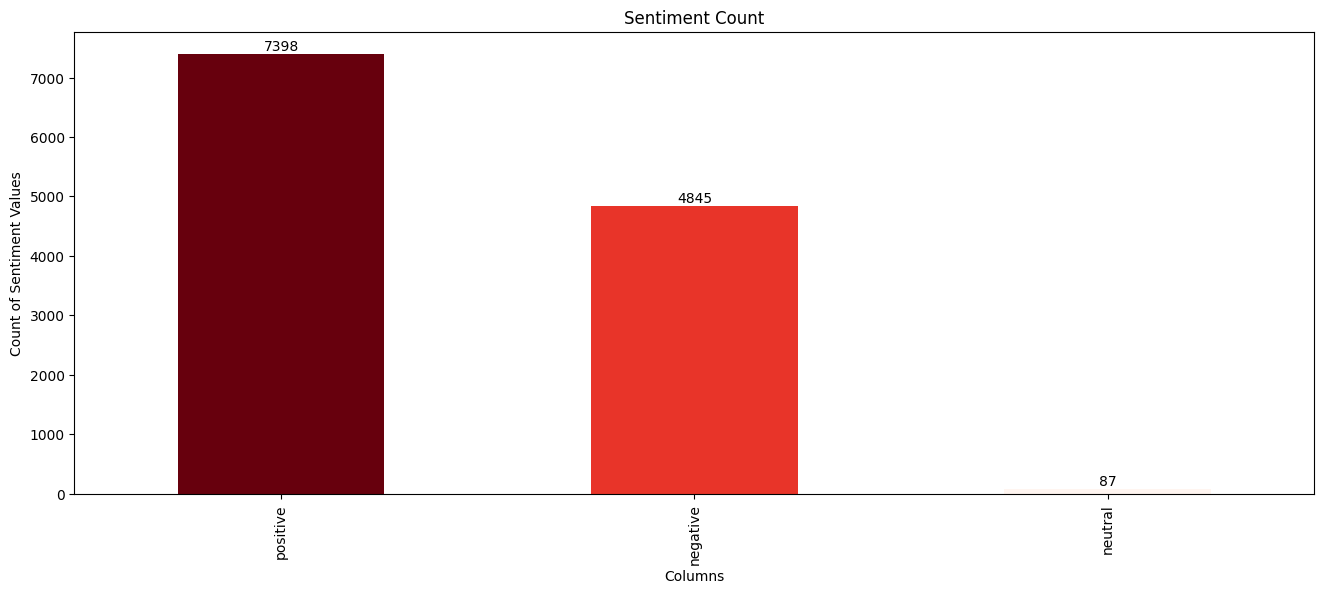

In [19]:
tb_counts = df['textblob_sentiment'].value_counts()

# Create a larger figure
plt.figure(figsize=(16, 6))

# Normalize the counts for coloring
norm = plt.Normalize(tb_counts.min(), tb_counts.max())
colors = plt.cm.Reds(norm(tb_counts))

# Create the bar plot with the specified colors
ax = tb_counts.plot(kind='bar', color=colors)

# Add labels to each bar
for i, count in enumerate(tb_counts):
    ax.text(i, count, str(count), ha='center', va='bottom')

# Show the plot
plt.xlabel('Columns')
plt.ylabel('Count of Sentiment Values')
plt.title('Sentiment Count')
plt.show()

### Using vaderSentiment For Labelling



In [20]:
pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.9 MB/s eta 0:00:00


In [21]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def vader_sentiment(text):
    vs = analyzer.polarity_scores(text)
    # VADER returns a compound score, where > 0 is positive, < 0 is negative, and around 0 is neutral
    if vs['compound'] > 0.05:
        return 'positive'
    elif vs['compound'] < -0.05:
        return 'negative'
    else:
        return 'neutral'

In [22]:
df['vader_sentiment'] = df['review_text'].apply(vader_sentiment)

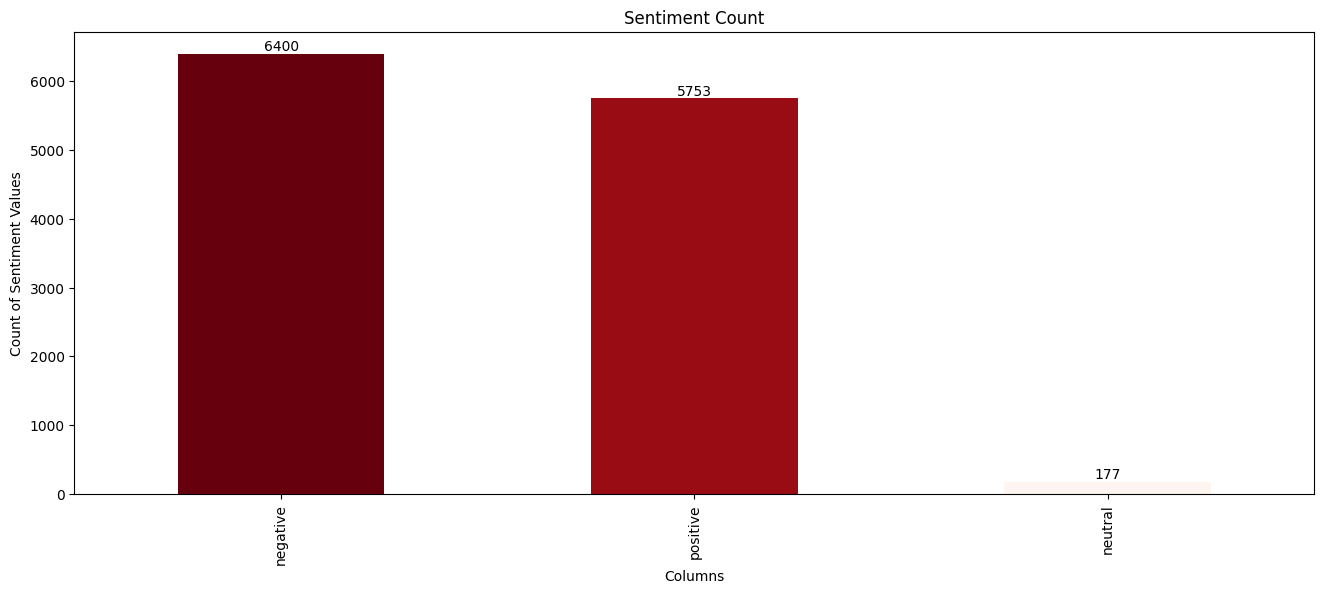

In [23]:
vs_counts = df['vader_sentiment'].value_counts()

# Create a larger figure
plt.figure(figsize=(16, 6))

# Normalize the counts for coloring
norm = plt.Normalize(vs_counts.min(), vs_counts.max())
colors = plt.cm.Reds(norm(vs_counts))

# Create the bar plot with the specified colors
ax = vs_counts.plot(kind='bar', color=colors)

# Add labels to each bar
for i, count in enumerate(vs_counts):
    ax.text(i, count, str(count), ha='center', va='bottom')

# Show the plot
plt.xlabel('Columns')
plt.ylabel('Count of Sentiment Values')
plt.title('Sentiment Count')
plt.show()

In [24]:
df[df['textblob_sentiment']==df['vader_sentiment']].shape

(9257, 19)

In [25]:
df=df[df['textblob_sentiment']==df['vader_sentiment']]

In [26]:
df.shape

(9257, 19)

In [27]:
df.drop(columns=['textblob_sentiment'],inplace=True)

/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [28]:
df.rename(columns={'vader_sentiment':'sentiment'},inplace=True)

/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [29]:
df.sample(10)

,unnamed:_0,reviewer_names,review_date,review_text,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_&_beverages,inflight_entertainment,ground_service,value_for_money,wifi_&_connectivity,recommended,sentiment
34551,34551,Laurie Oliver,2020-02-13,Not Verified | American Airlines is dishonest...,Solo Leisure,Solo Leisure,First Class,Denver to Savannah via Charlotte,January 2020,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,negative
15593,15593,K Davids,2016-05-11,✅ Verified Review | Impressive dinner service...,Boeing 737-800,Business,Economy Class,ADL to MEL,May 2016,4.0,5.0,4.0,3.0,4.0,3.0,5.0,yes,positive
4169,4169,C Heale,2022-04-03,✅ Trip Verified | This was the worst experien...,A380,Solo Leisure,Economy Class,New York to Male via Dubai,March 2022,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,negative
12624,12624,G Lorenesta,2017-03-02,✅ Verified Review | Flew Singapore Airlines f...,Boeing 777,Family Leisure,Economy Class,Singapore to Bangkok,June 2016,5.0,5.0,5.0,5.0,5.0,5.0,5.0,yes,positive
33308,33308,M Hudson,2022-03-31,✅ Trip Verified | On the whole I think AA's co...,Boeing 738,Business,Business Class,New Orleans to Mexico City via Dallas Fort-Worth,March 2022,4.0,3.0,4.0,4.0,5.0,3.0,5.0,yes,positive
4172,4172,R Kamarthan,2022-03-07,✅ Trip Verified | We were eligible for Dubai ...,Boeing 777-300 ER,Family Leisure,Economy Class,Melbourne to Trivandrum via Dubai,December 2021,2.0,3.0,4.0,3.0,3.0,3.0,2.0,no,negative
19600,19600,Henry Denkhaus,2023-04-28,✅ Trip Verified | We arrived in Atlanta from L...,Couple Leisure,Couple Leisure,Economy Class,Atlanta to West Palm Beach,April 2023,4.0,5.0,5.0,5.0,5.0,4.0,4.0,yes,negative
314,314,K Parker,2023-06-03,✅ Trip Verified | The worst experience in all...,Couple Leisure,Couple Leisure,Economy Class,London to Santorini,May 2023,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,negative
15319,15319,K Pahani,2017-11-29,✅ Trip Verified | Sydney to Hobart. The fligh...,Business,Business,Economy Class,Sydney to Hobart,November 2017,3.0,2.0,3.0,1.0,1.0,1.0,1.0,no,positive
676,676,Lisa Hamblin,2021-10-20,✅ Trip Verified | I have just returned from a...,Couple Leisure,Couple Leisure,Economy Class,Male to London,October 2021,5.0,5.0,5.0,5.0,5.0,5.0,5.0,yes,positive


In [30]:
positive_reviews = df[df['sentiment'] == 'positive']
negative_reviews = df[df['sentiment'] == 'negative']

In [31]:
positive_reviews.shape

(5100, 18)

In [32]:
negative_reviews.shape

(4154, 18)

In [33]:
positive_sample_size = 4000
negative_sample_size = 4000

In [34]:
positive_sample = positive_reviews.sample(positive_sample_size, random_state=42)
negative_sample = negative_reviews.sample(negative_sample_size, random_state=42)

In [35]:
stratified_data = pd.concat([positive_sample, negative_sample])

In [36]:
stratified_data.sample(10)

,unnamed:_0,reviewer_names,review_date,review_text,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_&_beverages,inflight_entertainment,ground_service,value_for_money,wifi_&_connectivity,recommended,sentiment
15504,15504,C Tarenzo,2016-11-06,"✅ Verified Review | Sydney to Melbourne, the ...",Couple Leisure,Couple Leisure,Economy Class,SYD to MEL,November 2016,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,negative
15327,15327,P Huang,2017-11-13,✅ Verified Review | Sydney to Melbourne. Anot...,Boeing 737-800,Couple Leisure,Business Class,Sydney to Melbourne,November 2017,3.0,3.0,3.0,3.0,3.0,3.0,3.0,yes,positive
22411,22411,Elena Sokolova,2024-07-23,✅ Trip Verified | Brazen swindlers. My bag fit...,Solo Leisure,Solo Leisure,Economy Class,Maimi to San Francisco,July 2024,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,positive
22810,22810,B Marden,2023-05-29,✅ Trip Verified | Never fly out of Houston. 5...,Solo Leisure,Solo Leisure,Premium Economy,Belize to Houston,May 2023,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,negative
24238,24238,A Carter,2019-09-30,✅ Trip Verified | I never like writing reviews...,Couple Leisure,Couple Leisure,Economy Class,Austin to Houston,September 2019,1.0,1.0,1.0,1.0,1.0,1.0,3.0,no,negative
1018,1018,Pauline O'Driscoll,2019-06-28,✅ Trip Verified | London Heathrow to New York....,Family Leisure,Family Leisure,Economy Class,London Heathrow to New York,June 2019,5.0,5.0,5.0,1.0,5.0,5.0,5.0,yes,positive
12010,12010,Francis Wong,2022-07-07,✅ Trip Verified | After 2 years of not being ...,A350-900,Solo Leisure,Business Class,Hong Kong to Singapore,June 2022,5.0,5.0,4.0,4.0,4.0,5.0,4.0,yes,positive
7969,7969,J Calebag,2016-07-25,✅ Verified Review | Barcelona to Doha had a d...,Business,Business,Economy Class,BCN to MNL via DOH,July 2016,5.0,5.0,5.0,5.0,5.0,5.0,5.0,yes,positive
33715,33715,Peter Pomeranze,2021-09-30,✅ Trip Verified | Contrary to many reviews her...,Boeing 777-200,Solo Leisure,First Class,Kona to Dallas,September 2021,5.0,5.0,4.0,4.0,4.0,2.0,5.0,yes,positive
3907,3907,L Mardele,2024-05-06,✅ Trip Verified | I have just collected my ba...,Couple Leisure,Couple Leisure,Economy Class,Dubai to Gatwick,May 2024,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,negative


In [37]:
stratified_data['sentiment'].value_counts()

,sentiment
positive,4000
negative,4000


In [38]:
df=stratified_data.copy()

In [39]:
df['num_characters'] = df['review_text'].apply(len)

In [40]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [41]:
df['num_words'] = df['review_text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [42]:
df['num_sentences'] = df['review_text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [43]:
df.sample(5)

,unnamed:_0,reviewer_names,review_date,review_text,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,...,food_&_beverages,inflight_entertainment,ground_service,value_for_money,wifi_&_connectivity,recommended,sentiment,num_characters,num_words,num_sentences
7793,7793,K Kelley,2017-05-06,✅ Verified Review | First Class on Qatar's A38...,A380,Couple Leisure,First Class,Doha to Sydney,March 2017,5.0,...,5.0,4.0,4.0,2.0,5.0,yes,positive,710,141,11
33377,33377,Adam Westenkirchner,2022-03-07,✅ Trip Verified | Was late to board from Char...,Boeing 787-9,Solo Leisure,Economy Class,Charleston to Tokyo via Dallas,March 2022,1.0,...,1.0,1.0,1.0,1.0,1.0,no,negative,234,43,5
10759,10759,B Hasselah,2018-11-25,✅ Trip Verified | Flew short-haul flight from...,A330-343,Business,Business Class,Seoul to Singapore,July 2018,4.0,...,5.0,4.0,5.0,1.0,5.0,yes,positive,557,105,6
17879,17879,B Lee,2018-01-24,✅ Trip Verified | Very disappointing! There is...,Boeing 777-300E,Solo Leisure,Business Class,Kosice to Singapore via Istanbul,January 2018,2.0,...,3.0,3.0,1.0,1.0,3.0,no,negative,801,155,7
13952,13952,S Johnson,2017-03-04,✅ Verified Review | I had a very good experie...,Boeing 777,Solo Leisure,Economy Class,Hong Kong to Zurich,February 2017,4.0,...,5.0,5.0,4.0,4.0,4.0,yes,positive,644,146,5


In [44]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,8000.000000,8000.000000,8000.000000
mean,820.578250,166.823125,9.370250
std,587.654868,120.798657,5.902099
min,115.000000,25.000000,1.000000
25%,421.000000,85.000000,5.750000
50%,647.000000,131.000000,8.000000
75%,1016.000000,208.000000,11.000000
max,4212.000000,831.000000,52.000000


##### Overview of the Summary Statistics:

* Count: Each of the three columns (num_characters, num_words, num_sentences) has
10,000 entries, indicating the total number of samples analyzed.

* Mean (Average):
  * Characters: The average text length is approximately 830 characters.
  * Words: On average, each entry contains about 169 words.
  * Sentences: Each entry has an average of about 9.5 sentences.

* Standard Deviation (std):

  * Characters: A standard deviation of about 594 indicates that there is considerable variation in text length across the entries.
  * Words: The standard deviation of approximately 122 suggests a moderate variation in the number of words.
  * Sentences: A standard deviation of about 5.9 indicates that the number of sentences also varies, but to a lesser extent.

* Minimum (min):

  * Characters: The shortest entry has 115 characters.
  * Words: The entry with the fewest words contains 25 words.
  * Sentences: The minimum number of sentences is 1.

* 25th Percentile (25%):

  * Characters: 25% of the entries have 424 characters or fewer.
  * Words: 25% of entries have 85 words or fewer.
  * Sentences: 25% have 5.75 sentences or fewer.

* Median (50%):

  * Characters: The median length is 652 characters, indicating that half of the entries are shorter than this value.
  * Words: The median is 132 words, suggesting that half of the entries contain fewer than 132 words.
  * Sentences: The median number of sentences is 8, meaning half of the entries have 8 sentences or fewer.

* 75th Percentile (75%):

  * Characters: 75% of entries have 1034 characters or fewer.
  * Words: 75% of entries have 211 words or fewer.
  * Sentences: 75% have 12 sentences or fewer.

* Maximum (max):

  * Characters: The longest entry contains 4212 characters.
  * Words: The longest entry has 831 words.
  * Sentences: The maximum number of sentences in an entry is 52.

In [45]:
df[df['sentiment'] == 'positive'][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4000.000000,4000.000000,4000.000000
mean,842.554500,170.132250,9.534750
std,614.605683,126.337512,6.178134
min,150.000000,25.000000,1.000000
25%,424.000000,85.000000,6.000000
50%,653.000000,132.000000,8.000000
75%,1046.000000,211.250000,12.000000
max,4212.000000,831.000000,50.000000


### Overview of the Summary Statistics:

* **Count**: Each of the three columns (num_characters, num_words, num_sentences) has 5,000 entries, indicating the total number of samples analyzed.

* **Mean (Average)**:
  * **Characters**: The average text length is approximately 858 characters.
  * **Words**: On average, each entry contains about 173 words.
  * **Sentences**: Each entry has an average of about 9.7 sentences.

* **Standard Deviation (std)**:
  * **Characters**: A standard deviation of about 623 indicates considerable variation in text length across the entries.
  * **Words**: The standard deviation of approximately 128 suggests a moderate variation in the number of words.
  * **Sentences**: A standard deviation of about 6.2 indicates that the number of sentences also varies, but to a lesser extent.

* **Minimum (min)**:
  * **Characters**: The shortest entry has 154 characters.
  * **Words**: The entry with the fewest words contains 25 words.
  * **Sentences**: The minimum number of sentences is 1.

* **25th Percentile (25%)**:
  * **Characters**: 25% of the entries have 430 characters or fewer.
  * **Words**: 25% of entries have 86 words or fewer.
  * **Sentences**: 25% have 6 sentences or fewer.

* **Median (50%)**:
  * **Characters**: The median length is 667 characters, indicating that half of the entries are shorter than this value.
  * **Words**: The median is 134 words, suggesting that half of the entries contain fewer than 134 words.
  * **Sentences**: The median number of sentences is 8, meaning half of the entries have 8 sentences or fewer.

* **75th Percentile (75%)**:
  * **Characters**: 75% of entries have 1076 characters or fewer.
  * **Words**: 75% of entries have 217 words or fewer.
  * **Sentences**: 75% have 12 sentences or fewer.

* **Maximum (max)**:
  * **Characters**: The longest entry contains 4212 characters.
  * **Words**: The longest entry has 831 words.
  * **Sentences**: The maximum number of sentences in an entry is 50.

In [46]:
df[df['sentiment'] == 'negative'][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4000.000000,4000.000000,4000.000000
mean,798.602000,163.514000,9.205750
std,558.620216,114.913912,5.608456
min,115.000000,25.000000,1.000000
25%,417.000000,85.000000,5.000000
50%,638.500000,131.000000,8.000000
75%,992.000000,205.000000,11.000000
max,3533.000000,765.000000,52.000000


### Overview of the Summary Statistics:

* **Count**: Each of the three columns (num_characters, num_words, num_sentences) has 5,000 entries, indicating the total number of samples analyzed.

* **Mean (Average)**:
  * **Characters**: The average text length is approximately 802 characters.
  * **Words**: On average, each entry contains about 164 words.
  * **Sentences**: Each entry has an average of about 9.2 sentences.

* **Standard Deviation (std)**:
  * **Characters**: A standard deviation of about 562 indicates considerable variation in text length across the entries.
  * **Words**: The standard deviation of approximately 116 suggests a moderate variation in the number of words.
  * **Sentences**: A standard deviation of about 5.7 indicates that the number of sentences also varies, but to a lesser extent.

* **Minimum (min)**:
  * **Characters**: The shortest entry has 115 characters.
  * **Words**: The entry with the fewest words contains 25 words.
  * **Sentences**: The minimum number of sentences is 1.

* **25th Percentile (25%)**:
  * **Characters**: 25% of the entries have 419 characters or fewer.
  * **Words**: 25% of entries have 85 words or fewer.
  * **Sentences**: 25% have 5 sentences or fewer.

* **Median (50%)**:
  * **Characters**: The median length is 643 characters, indicating that half of the entries are shorter than this value.
  * **Words**: The median is approximately 132.5 words, suggesting that half of the entries contain fewer than this number of words.
  * **Sentences**: The median number of sentences is 8, meaning half of the entries have 8 sentences or fewer.

* **75th Percentile (75%)**:
  * **Characters**: 75% of entries have 998 characters or fewer.
  * **Words**: 75% of entries have 206 words or fewer.
  * **Sentences**: 75% have 11 sentences or fewer.

* **Maximum (max)**:
  * **Characters**: The longest entry contains 3504 characters.
  * **Words**: The longest entry has 765 words.
  * **Sentences**: The maximum number of sentences in an entry is 52.

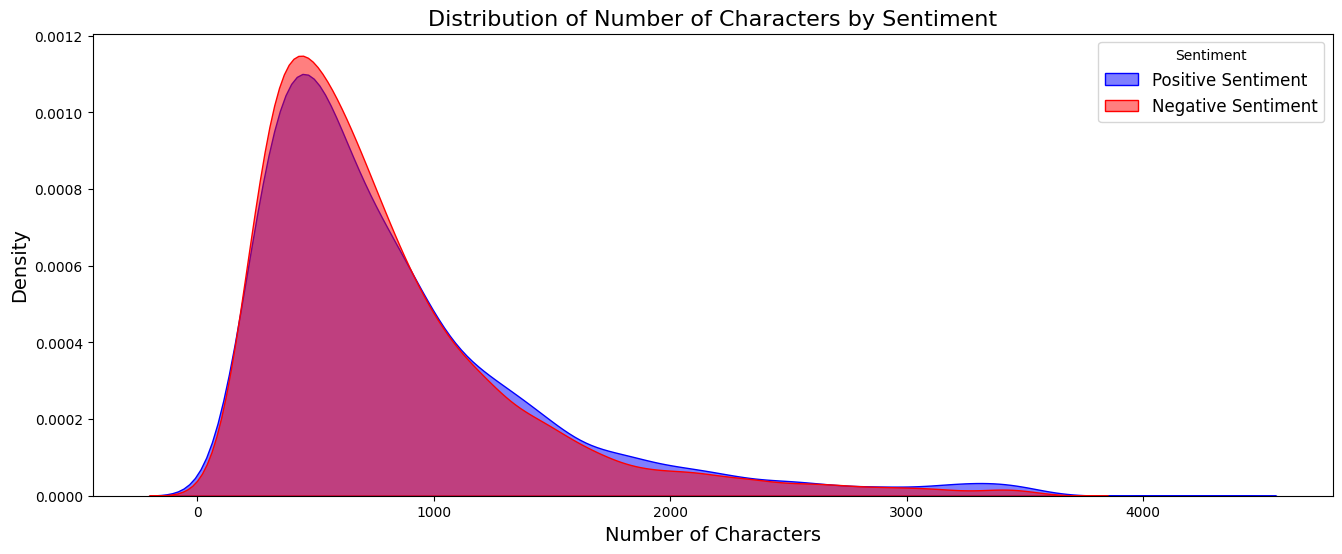

In [47]:
plt.figure(figsize=(16, 6))

# Plotting the KDE for positive sentiment
sb.kdeplot(df[df['sentiment'] == 'positive']['num_characters'], color='blue', label='Positive Sentiment', fill=True, alpha=0.5)

# Plotting the KDE for negative sentiment
sb.kdeplot(df[df['sentiment'] == 'negative']['num_characters'], color='red', label='Negative Sentiment', fill=True, alpha=0.5)

# Adding labels and title
plt.xlabel('Number of Characters', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('Distribution of Number of Characters by Sentiment', fontsize=16)
plt.legend(title='Sentiment', fontsize=12)

# Show the plot
plt.show()

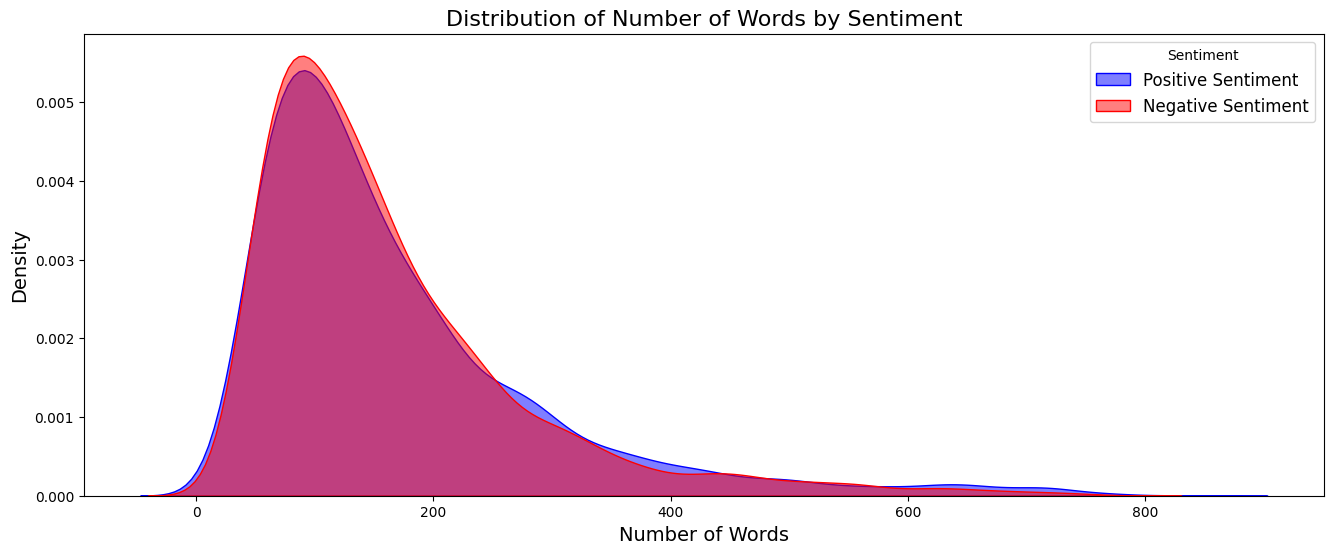

In [48]:
plt.figure(figsize=(16, 6))

# Plotting the KDE for positive sentiment
sb.kdeplot(df[df['sentiment'] == 'positive']['num_words'], color='blue', label='Positive Sentiment', fill=True, alpha=0.5)

# Plotting the KDE for negative sentiment
sb.kdeplot(df[df['sentiment'] == 'negative']['num_words'], color='red', label='Negative Sentiment', fill=True, alpha=0.5)

# Adding labels and title
plt.xlabel('Number of Words', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('Distribution of Number of Words by Sentiment', fontsize=16)
plt.legend(title='Sentiment', fontsize=12)

# Show the plot
plt.show()

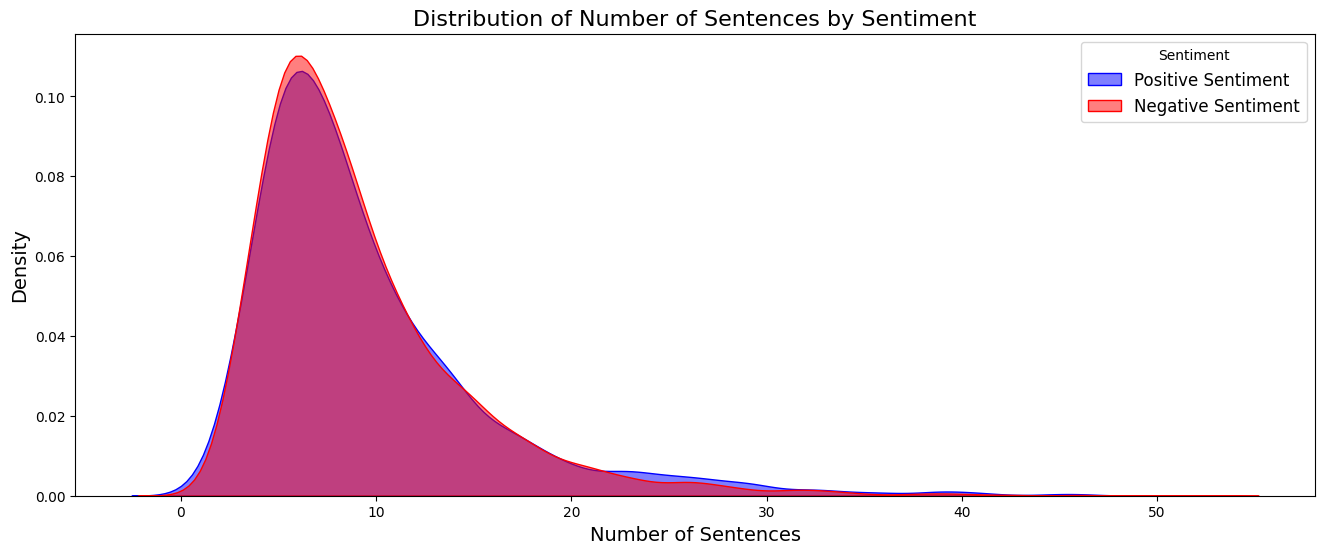

In [49]:
plt.figure(figsize=(16, 6))

# Plotting the KDE for positive sentiment
sb.kdeplot(df[df['sentiment'] == 'positive']['num_sentences'], color='blue', label='Positive Sentiment', fill=True, alpha=0.5)

# Plotting the KDE for negative sentiment
sb.kdeplot(df[df['sentiment'] == 'negative']['num_sentences'], color='red', label='Negative Sentiment', fill=True, alpha=0.5)

# Adding labels and title
plt.xlabel('Number of Sentences', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('Distribution of Number of Sentences by Sentiment', fontsize=16)
plt.legend(title='Sentiment', fontsize=12)

# Show the plot
plt.show()

 * **Key Observations:**
    * **Overlap**: The distributions for positive and negative sentiment are quite similar in shape and heavily overlap, implying that the length of a message does not vary drastically based on its sentiment.
    * **Negative Sentiment** Tends to Have a Higher Peak: The red (negative) distribution slightly peaks higher, suggesting that negative messages may have a slightly higher proportion at lower character counts than positive ones.
    * **Longer Messages**: After around 1000 characters, both distributions drop off, with very few messages longer than 2000 characters.
    

  * **In conclusion**, both positive and negative sentiments share a similar character length distribution, but negative sentiment tends to have a slightly higher density for shorter messages.

# Handling Emojis

In [50]:
!pip install emoji
import emoji


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 11.3 MB/s eta 0:00:00


In [51]:
def demojize_text(text):
    return emoji.demojize(text)

In [52]:
df.loc[:, 'clean_text'] = df['review_text'].apply(demojize_text)

In [53]:
df.sample(5)

,unnamed:_0,reviewer_names,review_date,review_text,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,...,inflight_entertainment,ground_service,value_for_money,wifi_&_connectivity,recommended,sentiment,num_characters,num_words,num_sentences,clean_text
15626,15626,Kathy Begg,2016-03-04,What a disappointment to travel economy with Q...,Boeing 737,Couple Leisure,Economy Class,ADL to PER,March 2016,1.0,...,1.0,1.0,1.0,1.0,no,negative,491,100,7,What a disappointment to travel economy with Q...
13709,13709,M Senner,2019-07-16,✅ Trip Verified | Zurich to Singapore. Would ...,Couple Leisure,Couple Leisure,Business Class,Zurich to Singapore,July 2019,4.0,...,4.0,4.0,4.0,4.0,yes,positive,299,58,4,:check_mark_button: Trip Verified | Zurich to...
34054,34054,J Bohn,2021-06-14,Not Verified | My spouse and I are frequent f...,Couple Leisure,Couple Leisure,Economy Class,Honolulu to Dulles,June 2021,1.0,...,1.0,1.0,1.0,1.0,no,positive,1333,258,12,Not Verified | My spouse and I are frequent f...
34968,34968,Elle Geare,2019-08-05,✅ Trip Verified | Philadelphia to Burlington....,Business,Business,Economy Class,Philadelphia to Burlington,August 2019,1.0,...,1.0,1.0,1.0,1.0,no,negative,321,62,8,:check_mark_button: Trip Verified | Philadelp...
13517,13517,M Vanoric,2022-11-16,✅ Trip Verified | I had terrible experience w...,Business,Business,Economy Class,Zagreb to Valencia via Zurich,October 2022,3.0,...,1.0,1.0,1.0,1.0,no,negative,667,136,7,:check_mark_button: Trip Verified | I had ter...


In [54]:
df['trip_verified'] = np.where(df['review_text'].str.contains('Trip Verified', case=False, na=False), 'yes', 'no')

In [55]:
df.sample(5)

,unnamed:_0,reviewer_names,review_date,review_text,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,...,ground_service,value_for_money,wifi_&_connectivity,recommended,sentiment,num_characters,num_words,num_sentences,clean_text,trip_verified
36930,36930,D Graubard,2016-08-02,✅ Verified Review | Chicago to Dusseldorf on ...,Boeing 767-300,Solo Leisure,Business Class,ORD to DUS,July 2016,5.0,...,3.0,1.0,4.0,yes,positive,1273,249,17,:check_mark_button: Verified Review | Chicago...,no
28588,28588,Peter Kniebusch,2022-05-08,✅ Trip Verified | After a flight in Economy to...,Boeing 787,Solo Leisure,Business Class,Amsterdam to Mexico City,May 2022,4.0,...,5.0,5.0,5.0,yes,positive,1235,253,22,:check_mark_button: Trip Verified | After a fl...,yes
37321,37321,J Rose,2015-11-08,Oneworld Emerald business class customer. Amer...,Boeing 777,Business,Business Class,MIA to GRU,November 2015,3.0,...,1.0,2.0,1.0,no,negative,732,133,11,Oneworld Emerald business class customer. Amer...,no
4967,4967,Louis Maripolsky,2017-08-02,✅ Verified Review | Flight from Bangkok to Du...,A380-8,Solo Leisure,Business Class,Bangkok to Dubai,July 2017,2.0,...,4.0,3.0,3.0,no,positive,711,141,13,:check_mark_button: Verified Review | Flight ...,no
19677,19677,C Keale,2023-01-22,✅ Trip Verified | I like Delta a lot especial...,A350 / A321,Solo Leisure,Premium Economy,Tokyo to Los Angeles via Detroit,January 2023,4.0,...,4.0,5.0,5.0,yes,positive,868,166,11,:check_mark_button: Trip Verified | I like De...,yes


# Lowercasing

In [56]:
df['clean_text']=df['clean_text'].str.lower()

In [57]:
df.sample(2)

,unnamed:_0,reviewer_names,review_date,review_text,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,...,ground_service,value_for_money,wifi_&_connectivity,recommended,sentiment,num_characters,num_words,num_sentences,clean_text,trip_verified
5389,5389,J O'Reilly,2016-01-27,"Sydney to Dublin via Dubai, and Emirates have ...",Boeing 777-300ER,Couple Leisure,Business Class,SYD to DUB via DXB,December 2015,3.0,...,2.0,4.0,4.0,yes,positive,410,79,5,"sydney to dublin via dubai, and emirates have ...",no
34676,34676,Paul Lenser,2019-12-16,Not Verified | On my way from Miami to Sacram...,Business,Business,Economy Class,Miami to Dallas via Sacramento,December 2019,4.0,...,1.0,5.0,1.0,no,negative,535,111,6,not verified | on my way from miami to sacram...,no


# Dealing with chat words

In [58]:
chat_words={
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BF": "Boy Friend",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "lol": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "4MY": "For My",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "R": "Are",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when. TFW internet slang often goes in a caption to an image.",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don’t care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can’t stop laughing"

}

In [59]:
def chat_conversion(text):
    new_text = []
    for w in text.split():
        if w.upper() in chat_words:
            new_text.append(chat_words[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)

In [60]:
df['clean_text']=df['clean_text'].apply(chat_conversion)

# dealing with punctuation

In [61]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [62]:
exclude = string.punctuation

In [63]:
def remove_punc(text):
    return text.translate(str.maketrans('', '', exclude))

In [64]:
df['clean_text']=df['clean_text'].apply(remove_punc)

In [65]:
df.head(2)

,unnamed:_0,reviewer_names,review_date,review_text,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,...,ground_service,value_for_money,wifi_&_connectivity,recommended,sentiment,num_characters,num_words,num_sentences,clean_text,trip_verified
26587,26587,W Robert Kmen,2015-06-17,"Onboard UA 113, MUC-IAD. Full disclosure - I a...",Boeing 767-400,Solo Leisure,Premium Economy,MUC to IAD,June 2015,5.0,...,3.0,5.0,5.0,yes,positive,1025,206,13,onboard ua 113 muciad full disclosure i am a ...,no
25304,25304,D Steanson,2018-03-24,✅ Trip Verified | Mexico City to Newark. What...,Business,Business,Economy Class,Mexico City to Newark,March 2018,4.0,...,3.0,1.0,3.0,no,positive,750,162,8,checkmarkbutton trip verified mexico city to ...,yes


# Tokenization

In [66]:
import spacy
nlp=spacy.load('en_core_web_sm')

In [67]:
df['clean_text']=df['clean_text'].apply(lambda text: [token.text for token in nlp(text)])

In [68]:
df.sample(5)

,unnamed:_0,reviewer_names,review_date,review_text,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,...,ground_service,value_for_money,wifi_&_connectivity,recommended,sentiment,num_characters,num_words,num_sentences,clean_text,trip_verified
24448,24448,Pang Vang,2019-06-13,✅ Trip Verified | If I could give negative st...,Solo Leisure,Solo Leisure,Economy Class,San Francisco to Minneapolis,June 2019,1.0,...,1.0,2.0,1.0,no,negative,654,143,13,"[checkmarkbutton, trip, verified, , if, i, co...",yes
31423,31423,G Pelanis,2018-05-07,✅ Trip Verified | Miami to Athens via Copenha...,Couple Leisure,Couple Leisure,Economy Class,Miami to Athens via Copenhagen,May 2018,1.0,...,1.0,1.0,1.0,no,negative,934,187,9,"[checkmarkbutton, trip, verified, , miami, to...",yes
7316,7316,Faruk Muktadir,2019-05-23,✅ Trip Verified | Doha to New York. Great exp...,A350 XWB,Business,Business Class,Doha to New York,April 2019,5.0,...,4.0,4.0,5.0,yes,positive,761,150,10,"[checkmarkbutton, trip, verified, , doha, to,...",yes
14650,14650,Kendall Wright,2022-12-29,Not Verified | I want to talk about service in...,A330,Couple Leisure,Business Class,Bangkok to Sydney,December 2022,4.0,...,2.0,1.0,1.0,no,positive,3360,671,22,"[not, verified, , i, want, to, talk, about, s...",no
36613,36613,David MacDonneil,2017-05-04,✅ Verified Review | San Francisco to Springfi...,Solo Leisure,Solo Leisure,Economy Class,San Francisco to Springfield via Dallas,May 2017,2.0,...,1.0,1.0,1.0,no,negative,1182,251,12,"[checkmarkbutton, verified, review, , san, fr...",no


# Stop words Removal

In [69]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [70]:
# Add custom words to the stopwords list
custom_words = ['checkmarkbutton', 'verified']
stop_words = set(stopwords.words('english'))
stop_words.update(custom_words)

In [71]:
def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in stop_words]

In [72]:
df['clean_text']=df['clean_text'].apply(remove_stopwords)

In [73]:
df.sample(5)

,unnamed:_0,reviewer_names,review_date,review_text,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,...,ground_service,value_for_money,wifi_&_connectivity,recommended,sentiment,num_characters,num_words,num_sentences,clean_text,trip_verified
10834,10834,Alexandre Lion,2018-05-09,✅ Trip Verified | Bangkok to Singapore. Wante...,Boeing 787-10,Business,Business Class,Bangkok to Singapore,April 2018,5.0,...,5.0,5.0,5.0,yes,positive,714,144,6,"[trip, , bangkok, singapore, wanted, try, reg...",yes
4321,4321,Matthew Phillips,2020-01-23,✅ Trip Verified | Stansted to Singapore via D...,Solo Leisure,Solo Leisure,Economy Class,Stansted to Singapore via Dubai,January 2020,4.0,...,1.0,3.0,4.0,no,negative,1650,327,19,"[trip, , stansted, singapore, via, dubai, fli...",yes
18213,18213,R Pierson,2016-05-05,San Francisco to Istanbul and return in the pa...,Boeing 777,Couple Leisure,Business Class,SFO to IST,April 2016,5.0,...,4.0,5.0,5.0,yes,positive,840,180,9,"[san, francisco, istanbul, return, past, 3, we...",no
15600,15600,Hayley Thompson,2016-04-27,✅ Verified Review | Just got off a Singapore ...,Boeing 737,Couple Leisure,Economy Class,SIN to PER,April 2016,1.0,...,2.0,1.0,1.0,no,negative,719,152,9,"[review, , got, singapore, perth, flight, qan...",no
20038,20038,Caroline Parker,2022-04-03,✅ Trip Verified | I am never flying Delta Air...,Solo Leisure,Solo Leisure,Economy Class,Boston to Raleigh Durham,April 2022,1.0,...,1.0,1.0,1.0,no,positive,336,66,3,"[trip, , never, flying, delta, air, lines, de...",yes


# Steming

In [74]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [75]:
df['clean_text']=df['clean_text'].apply(lambda x: [stemmer.stem(word) for word in x])

In [76]:
df.sample(5)

,unnamed:_0,reviewer_names,review_date,review_text,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,...,ground_service,value_for_money,wifi_&_connectivity,recommended,sentiment,num_characters,num_words,num_sentences,clean_text,trip_verified
6844,6844,Runar Jensen,2022-04-12,✅ Trip Verified | Qatar Airways always delive...,A350,Solo Leisure,Business Class,Oslo to Phuket via Doha,March 2022,5.0,...,5.0,5.0,5.0,yes,positive,184,38,3,"[trip, , qatar, airway, alway, deliv, superb,...",yes
33601,33601,J Raby,2021-11-30,✅ Trip Verified | Worst gate agents on the pl...,Family Leisure,Family Leisure,Economy Class,Nashville to Seattle,November 2021,1.0,...,1.0,1.0,1.0,no,negative,572,122,8,"[trip, , worst, gate, agent, planet, flight, ...",yes
17102,17102,Sean Kavanagh,2021-08-25,Not Verified | This is pretty interesting. Th...,Solo Leisure,Solo Leisure,Economy Class,Antalya to Miami via Istanbul,August 2021,1.0,...,1.0,1.0,1.0,no,negative,551,113,6,"[ , pretti, interest, second, tear, eye, visit...",no
34457,34457,Michael Russell,2020-05-21,Not Verified | This will be the last time I f...,Business,Business,Economy Class,Honolulu to Nashville via Los Angeles,May 2020,1.0,...,1.0,1.0,1.0,no,positive,566,129,6,"[ , last, tear, eye, fli, airlin, n’t, even, b...",no
24103,24103,Hamid Farahbakhsh,2019-12-20,Not Verified | Newark to Zurich. This flight ...,Family Leisure,Family Leisure,Economy Class,Newark to Zurich,December 2019,2.0,...,1.0,2.0,1.0,no,negative,989,214,14,"[ , newark, zurich, flight, experi, far, worst...",no


# removing special characters

In [77]:
import re

def remove_special_characters(text):
    # Define a regex pattern to match special characters
    pattern = r'[^a-zA-Z0-9\s]'

    # Use re.sub() to replace special characters with an empty string
    cleaned_text = re.sub(pattern, '', text)

    return cleaned_text

In [78]:
df.sample(5)

,unnamed:_0,reviewer_names,review_date,review_text,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,...,ground_service,value_for_money,wifi_&_connectivity,recommended,sentiment,num_characters,num_words,num_sentences,clean_text,trip_verified
36403,36403,B Dawson,2017-10-24,✅ Verified Review | Flew American Airlines in...,A321 & Boeing 738,Business,Premium Economy,Austin to Las Vegas via Los Angeles,October 2017,4.0,...,5.0,5.0,5.0,yes,positive,953,195,13,"[review, , flew, american, airlin, mce, austi...",no
25096,25096,L Davies,2018-07-18,✅ Trip Verified | We were very disappointed in...,"Boeing 737, CRJ200",Couple Leisure,Economy Class,Salt Lake City to Lansing via Chicago,July 2018,1.0,...,3.0,1.0,1.0,no,negative,2136,442,25,"[trip, , disappoint, unit, airlin, got, gate,...",yes
25843,25843,Joseph T Mott,2016-12-24,Newark to Rome. My wife and I were going to Ro...,Family Leisure,Family Leisure,Economy Class,EWR to FCO,July 2016,2.0,...,1.0,2.0,1.0,no,positive,847,173,13,"[newark, rome, wife, go, rome, visit, son, fli...",no
27880,27880,S Lubis,2016-01-15,"Red eye flight to Osaka on board Garuda A332, ...",A330,Couple Leisure,Business Class,CGK to ITM,January 2016,5.0,...,5.0,4.0,5.0,yes,positive,787,150,9,"[red, eye, flight, osaka, board, garuda, a332,...",no
21075,21075,C Porter,2018-07-31,✅ Trip Verified | Atlanta to Sacramento. They...,Family Leisure,Family Leisure,Economy Class,Atlanta to Sacramento,July 2018,1.0,...,1.0,1.0,1.0,no,negative,585,118,7,"[trip, , atlanta, sacramento, absolut, worst,...",yes


In [79]:
df['clean_text']=df['clean_text'].apply(lambda tokens: ' '.join(tokens))

In [80]:
df.sample(5)

,unnamed:_0,reviewer_names,review_date,review_text,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,...,ground_service,value_for_money,wifi_&_connectivity,recommended,sentiment,num_characters,num_words,num_sentences,clean_text,trip_verified
20588,20588,D Gealan,2019-12-03,✅ Trip Verified | Worst airline ever. I booke...,Solo Leisure,Solo Leisure,Economy Class,West Palm Beach to Montréal via LaGuardia,November 2019,4.0,...,1.0,1.0,1.0,no,negative,468,100,7,trip worst airlin ever book flight west palm...,yes
17341,17341,M Andrews,2020-01-05,✅ Trip Verified | Rome to Guangzhou via Istanb...,Boeing 777 / A320,Couple Leisure,Business Class,Rome to Guangzhou via Istanbul,January 2020,2.0,...,1.0,2.0,1.0,no,negative,399,83,7,trip rome guangzhou via istanbul first last ...,yes
13497,13497,R Barullia,2023-02-11,✅ Trip Verified | Charge you to select seats ...,Solo Leisure,Solo Leisure,Economy Class,Zurich to Warsaw,February 2023,3.0,...,1.0,2.0,2.0,no,negative,305,66,3,trip charg select seat move seat 22 row back...,yes
22996,22996,David Taylor,2022-12-18,✅ Trip Verified | Horrible. I was traveling t...,Solo Leisure,Solo Leisure,Economy Class,Salt lake city to Frankfurt via Chicago / Amst...,December 2022,1.0,...,1.0,1.0,1.0,no,negative,633,131,9,trip horribl travel germani see two son amst...,yes
11863,11863,Jurgen Henkel,2023-09-15,"Not Verified | As always great new planes, fri...",Boeing 787/777,Family Leisure,Economy Class,Perth to Phuket via Singapore,September 2023,5.0,...,5.0,5.0,5.0,yes,positive,258,53,4,alway great new plane friendli servic lot le...,no


In [81]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [82]:
positive_wc = wc.generate(df[df['sentiment'] == 'positive']['clean_text'].str.cat(sep=" "))

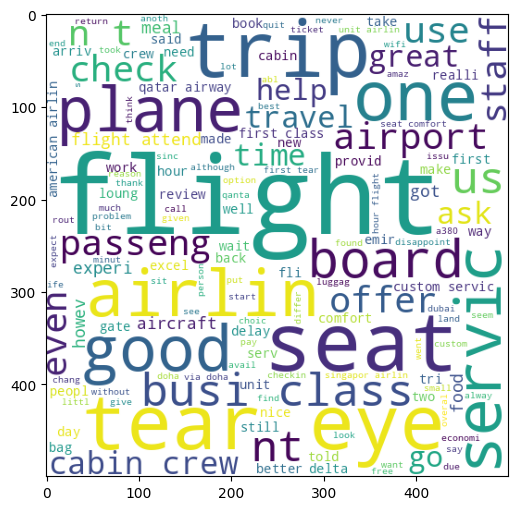

In [83]:
plt.figure(figsize=(16,6))
plt.imshow(positive_wc)

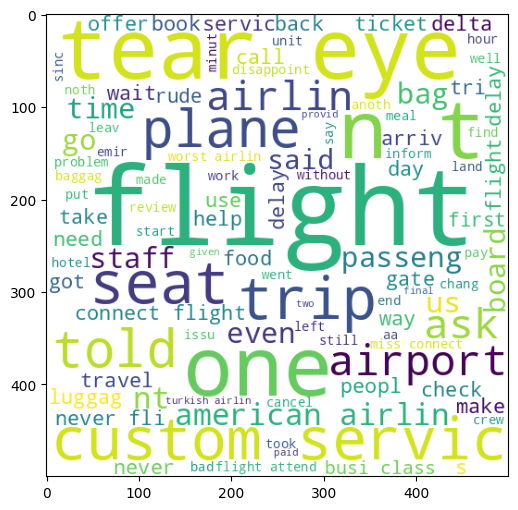

In [84]:
negative_wc = wc.generate(df[df['sentiment'] == 'negative']['clean_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(negative_wc)

In [85]:
positive_corpus = []
for text in df[df['sentiment'] == 'positive']['clean_text'].tolist():
    for t in text.split():
        positive_corpus.append(t)

In [86]:
len(positive_corpus)

321351

In [87]:
import warnings
warnings.filterwarnings('ignore')
from collections import Counter

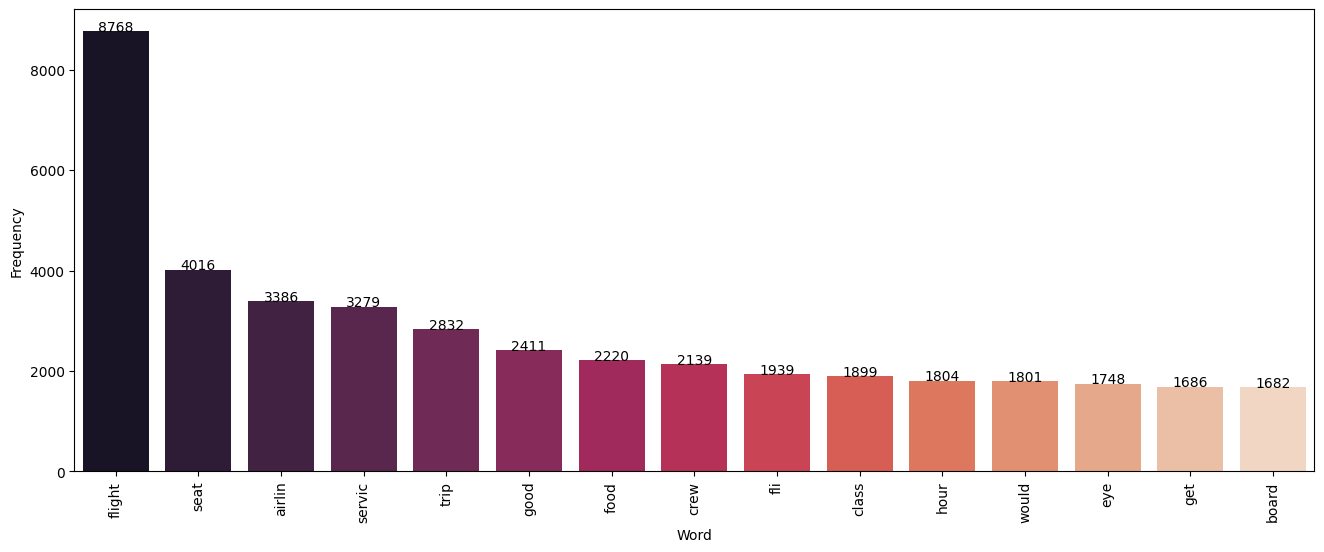

In [88]:
# Assuming positive_corpus is a list of words or tokens
most_common_words = Counter(positive_corpus).most_common(15)

# Convert the most common words to a DataFrame
common_words_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# Set the figure size
plt.figure(figsize=(16, 6))

# Create a barplot, with colors scaled from highest to lowest frequency
colors = sb.color_palette("rocket", len(common_words_df))  # Using the 'viridis' palette
sb.barplot(x='Word', y='Frequency', data=common_words_df, palette=colors)

# Rotate x-axis labels for readability
plt.xticks(rotation='vertical')

# Add labels for each bar
for index, row in common_words_df.iterrows():
    plt.text(index, row.Frequency, round(row.Frequency, 2), color='black', ha="center")

# Show the plot
plt.show()

In [89]:
negative_corpus = []
for text in df[df['sentiment'] == 'negative']['clean_text'].tolist():
    for t in text.split():
        negative_corpus.append(t)

In [90]:
len(negative_corpus)

299698

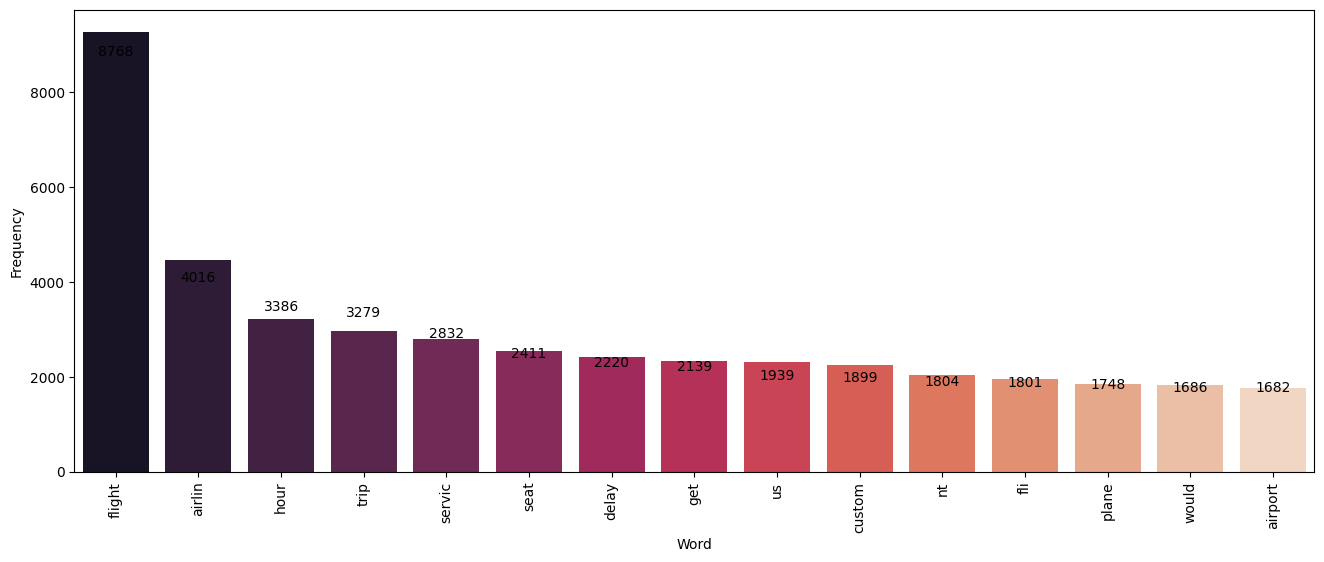

In [91]:
# Assuming positive_corpus is a list of words or tokens
most_common_word = Counter(negative_corpus).most_common(15)

# Convert the most common words to a DataFrame
common_words_df1 = pd.DataFrame(most_common_word, columns=['Word', 'Frequency'])

# Set the figure size
plt.figure(figsize=(16, 6))

# Create a barplot, with colors scaled from highest to lowest frequency
colors = sb.color_palette("rocket", len(common_words_df1))  # Using the 'viridis' palette
sb.barplot(x='Word', y='Frequency', data=common_words_df1, palette=colors)

# Rotate x-axis labels for readability
plt.xticks(rotation='vertical')

# Add labels for each bar
for index, row in common_words_df.iterrows():
    plt.text(index, row.Frequency, round(row.Frequency, 2), color='black', ha="center")

# Show the plot
plt.show()

In [92]:
df.columns

Index(['unnamed:_0', 'reviewer_names', 'review_date', 'review_text',
       'aircraft', 'type_of_traveller', 'seat_type', 'route', 'date_flown',
       'seat_comfort', 'cabin_staff_service', 'food_&_beverages',
       'inflight_entertainment', 'ground_service', 'value_for_money',
       'wifi_&_connectivity', 'recommended', 'sentiment', 'num_characters',
       'num_words', 'num_sentences', 'clean_text', 'trip_verified'],
      dtype='object')

In [93]:
#performing encoding on recommended column yes as 1 no as 0

df['trip_verified'] = df['trip_verified'].map({'yes': 1, 'no': 0})


In [94]:

df['recommended'] = df['recommended'].map({'yes': 1, 'no': 0})

In [95]:

df['sentiment_encoded'] = df['sentiment'].map({'positive': 1, 'negative': 0})

In [96]:
df.sample(5)

,unnamed:_0,reviewer_names,review_date,review_text,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,...,value_for_money,wifi_&_connectivity,recommended,sentiment,num_characters,num_words,num_sentences,clean_text,trip_verified,sentiment_encoded
4950,4950,Mohammad Faizal,2017-09-01,✅ Verified Review | Dubai to Manchester. I am...,A380,Solo Leisure,Business Class,Dubai to Manchester,August 2017,5.0,...,3.0,5.0,1,positive,274,51,5,review dubai manchest emir gold passeng a380...,0,1
4106,4106,Ahmed Alhilou,2022-08-28,✅ Trip Verified | A very pleasant trip on Emi...,Boeing 777-300ER,Solo Leisure,Economy Class,Dallas Ft Worth to Dubai,August 2022,4.0,...,5.0,5.0,1,positive,506,98,8,trip pleasant trip emir economi dalla dubai ...,1,1
32129,32129,Venus Woke,2024-05-25,✅ Trip Verified | They started out delaying o...,Family Leisure,Family Leisure,Economy Class,Philadelphia to Raleigh Durham,May 2024,1.0,...,1.0,1.0,0,negative,2040,397,19,trip start delay flight plc upon arriv phila...,1,0
25034,25034,Shaun Gray,2018-08-15,✅ Trip Verified | \r\nNewark to London. Over ...,Business,Business,Economy Class,Newark to London,August 2018,1.0,...,1.0,1.0,0,negative,992,199,9,trip newark london last 6 month flown multip...,1,0
8111,8111,R Lloyd,2016-02-01,Qatar Airways flight from Doha to Edinburgh ar...,Boeing 787,Business,Economy Class,DOH to EDI,January 2016,2.0,...,5.0,5.0,0,positive,303,56,4,qatar airway flight doha edinburgh arriv tear ...,0,1


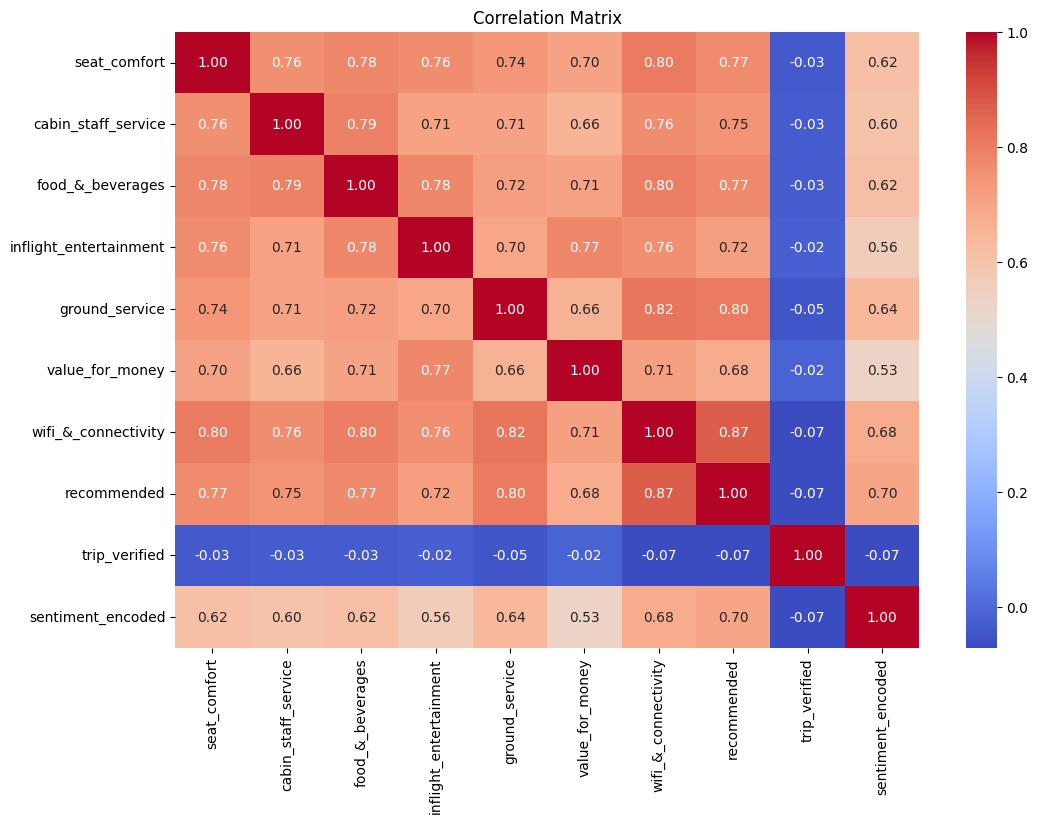

In [97]:
# Select only the columns you want to include in the correlation matrix
correlation_columns = ['seat_comfort', 'cabin_staff_service', 'food_&_beverages', 'inflight_entertainment',
                       'ground_service', 'value_for_money', 'wifi_&_connectivity',
                       'recommended','trip_verified','sentiment_encoded']  # Exclude 'trip_verified' as it's likely categorical

# Calculate the correlation matrix
correlation_matrix = df[correlation_columns].corr()
# You can also visualize the correlation matrix using a heatmap:
plt.figure(figsize=(12, 8))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [98]:
df.sample(10)

,unnamed:_0,reviewer_names,review_date,review_text,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,...,value_for_money,wifi_&_connectivity,recommended,sentiment,num_characters,num_words,num_sentences,clean_text,trip_verified,sentiment_encoded
19364,19364,Olga Stosic,2024-05-03,Not Verified | In January 2020 my husband and ...,Couple Leisure,Couple Leisure,Premium Economy,Sydney to New York,June 2023,4.0,...,4.0,5.0,1,positive,880,176,7,januari 2020 husband merci dash youngest son...,0,1
4039,4039,Ryan Ziad,2023-03-17,✅ Trip Verified | I would not have bought the...,Solo Leisure,Solo Leisure,Economy Class,Auckland to Melbourne,February 2023,1.0,...,1.0,1.0,0,negative,449,94,8,trip would bought emir ticket knew fli qanta...,1,0
32436,32436,P Valera,2023-07-28,✅ Trip Verified | American Airlines is the wo...,Business,Business,Economy Class,Burbank to Phoenix,July 2023,1.0,...,1.0,1.0,0,negative,449,89,5,trip american airlin worst airlin us treat b...,1,0
29080,29080,H Meakor,2018-05-07,✅ Trip Verified | Excellent flight with KLM. I...,Boeing 787-9,Solo Leisure,Economy Class,Amsterdam to Mauritius,February 2018,4.0,...,5.0,4.0,1,positive,581,114,6,trip excel flight klm flew amsterdam mauriti...,1,1
27565,27565,N Salthon,2019-01-10,"✅ Trip Verified | Sydney to Jakarta, the serv...",A330-300,Solo Leisure,Economy Class,Sydney to Jakarta,December 2018,3.0,...,3.0,3.0,1,positive,627,119,5,trip sydney jakarta servic great flight sche...,1,1
10560,10560,Basil Ben,2019-11-13,✅ Trip Verified | Sydney to Trivandrum via Si...,A320,Solo Leisure,Economy Class,Sydney to Trivandrum via Singapore,November 2019,1.0,...,1.0,1.0,0,positive,877,172,9,trip sydney trivandrum via singapor book fli...,1,1
665,665,A Merson,2021-11-13,✅ Trip Verified | This whole experience was s...,Boeing 777,Couple Leisure,Economy Class,Manchester to Nassau via London,October 2021,2.0,...,1.0,1.0,0,negative,994,195,11,trip whole experi sicken 35 grand spent holi...,1,0
37006,37006,B Johnson,2016-06-08,✅ Verified Review | Flying American Airlines ...,Solo Leisure,Solo Leisure,Economy Class,DFW to DCA,June 2016,2.0,...,1.0,1.0,0,negative,736,159,7,review fli american airlin one worst experi ...,0,0
17171,17171,Kevin Costello,2021-02-26,Not Verified | The award for the biggest dete...,A350,Business,Business Class,New York to İstanbul,February 2021,3.0,...,2.0,1.0,0,negative,428,83,3,award biggest deterior qualiti goe turkish a...,0,0
36575,36575,Javier Bacallado,2017-06-09,✅ Verified Review | Montevideo to Miami. Over...,Boeing 767,Business,Business Class,Montevideo to Miami,June 2017,5.0,...,5.0,5.0,1,positive,511,111,12,review montevideo miami overal good experi c...,0,1


In [99]:
df.columns

Index(['unnamed:_0', 'reviewer_names', 'review_date', 'review_text',
       'aircraft', 'type_of_traveller', 'seat_type', 'route', 'date_flown',
       'seat_comfort', 'cabin_staff_service', 'food_&_beverages',
       'inflight_entertainment', 'ground_service', 'value_for_money',
       'wifi_&_connectivity', 'recommended', 'sentiment', 'num_characters',
       'num_words', 'num_sentences', 'clean_text', 'trip_verified',
       'sentiment_encoded'],
      dtype='object')

In [100]:
#performing encoding on recommended column positive as 1 negative as 0
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})


In [101]:
df.sample(2)

,unnamed:_0,reviewer_names,review_date,review_text,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,...,value_for_money,wifi_&_connectivity,recommended,sentiment,num_characters,num_words,num_sentences,clean_text,trip_verified,sentiment_encoded
7887,7887,Jelle Holler,2016-12-31,✅ Verified Review | Oslo to Bangkok via Doha....,Boeing 787-8 / 777-300ER,Couple Leisure,Business Class,OSL to BKK via DOH,October 2016,4.0,...,3.0,5.0,1,1,1334,272,19,review oslo bangkok via doha board oslo bit ...,0,1
28796,28796,Rishy Cletus,2020-01-15,✅ Trip Verified | I travelled from Buenos Aire...,Business,Business,Economy Class,Buenos Aires to Mumbai via Amsterdam,January 2020,4.0,...,4.0,4.0,1,1,368,67,4,trip travel bueno air mumbai via amsterdam k...,1,1


In [102]:
df.columns

Index(['unnamed:_0', 'reviewer_names', 'review_date', 'review_text',
       'aircraft', 'type_of_traveller', 'seat_type', 'route', 'date_flown',
       'seat_comfort', 'cabin_staff_service', 'food_&_beverages',
       'inflight_entertainment', 'ground_service', 'value_for_money',
       'wifi_&_connectivity', 'recommended', 'sentiment', 'num_characters',
       'num_words', 'num_sentences', 'clean_text', 'trip_verified',
       'sentiment_encoded'],
      dtype='object')

In [103]:
numerics_columns=['seat_type','seat_comfort','cabin_staff_service','food_&_beverages','inflight_entertainment','ground_service','value_for_money','wifi_&_connectivity','trip_verified','recommended','sentiment']

In [104]:
df.head(5)

,unnamed:_0,reviewer_names,review_date,review_text,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,...,value_for_money,wifi_&_connectivity,recommended,sentiment,num_characters,num_words,num_sentences,clean_text,trip_verified,sentiment_encoded
26587,26587,W Robert Kmen,2015-06-17,"Onboard UA 113, MUC-IAD. Full disclosure - I a...",Boeing 767-400,Solo Leisure,Premium Economy,MUC to IAD,June 2015,5.0,...,5.0,5.0,1,1,1025,206,13,onboard ua 113 muciad full disclosur ua gold...,0,1
25304,25304,D Steanson,2018-03-24,✅ Trip Verified | Mexico City to Newark. What...,Business,Business,Economy Class,Mexico City to Newark,March 2018,4.0,...,1.0,3.0,0,1,750,162,8,trip mexico citi newark happen treat courtes...,1,1
6396,6396,E Calensca,2024-03-19,✅ Trip Verified | Excellent food and flight a...,Boeing 777,Couple Leisure,Economy Class,Doha to Melbourne,February 2024,4.0,...,5.0,5.0,1,1,173,32,4,trip excel food flight attend servic shanika...,1,1
35497,35497,Nathaniel Phillips,2019-01-16,Not Verified | The flight was delayed for 9 h...,Boeing 777,Solo Leisure,Economy Class,New York to London via Los Angeles,December 2018,1.0,...,1.0,1.0,0,1,410,76,4,flight delay 9 hour compens offer compar hot...,0,1
804,804,S Morton,2020-01-26,✅ Trip Verified | London Heathrow to Bangkok. ...,Boeing 777-200,Solo Leisure,Economy Class,London Heathrow to Bangkok,January 2020,2.0,...,1.0,2.0,0,1,390,76,5,trip london heathrow bangkok done rout time ...,1,1


In [105]:
cdf = df[numerics_columns].reset_index(drop=True)

In [106]:
df['seat_type'].value_counts()

,seat_type
Economy Class,5749
Business Class,1471
Premium Economy,431
First Class,349


In [107]:
cdf_encoded=pd.get_dummies(cdf, columns=['seat_type']).astype(int)

In [108]:
cdf_encoded

,seat_comfort,cabin_staff_service,food_&_beverages,inflight_entertainment,ground_service,value_for_money,wifi_&_connectivity,trip_verified,recommended,sentiment,seat_type_Business Class,seat_type_Economy Class,seat_type_First Class,seat_type_Premium Economy
0,5,5,2,4,3,5,5,0,1,1,0,0,0,1
1,4,2,1,1,3,1,3,1,0,1,0,1,0,0
2,4,5,5,4,5,5,5,1,1,1,0,1,0,0
3,1,1,1,1,1,1,1,0,0,1,0,1,0,0
4,2,4,4,1,4,1,2,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,1,1,1,2,1,2,1,1,0,0,0,1,0,0
7996,4,1,1,3,1,4,2,0,0,0,0,0,0,1
7997,1,1,1,1,1,1,1,1,0,0,0,1,0,0
7998,1,1,1,1,1,1,1,1,0,0,0,1,0,0


In [109]:
cdf.columns

Index(['seat_type', 'seat_comfort', 'cabin_staff_service', 'food_&_beverages',
       'inflight_entertainment', 'ground_service', 'value_for_money',
       'wifi_&_connectivity', 'trip_verified', 'recommended', 'sentiment'],
      dtype='object')

In [110]:
cdf_encoded.rename(columns={'seat_type_Business Class': 'business_class', 'seat_type_Economy Class': 'economy_class','seat_type_First Class':'first_class','seat_type_Premium Economy':'premium_economy'}, inplace=True)

In [111]:
cdf_encoded

,seat_comfort,cabin_staff_service,food_&_beverages,inflight_entertainment,ground_service,value_for_money,wifi_&_connectivity,trip_verified,recommended,sentiment,business_class,economy_class,first_class,premium_economy
0,5,5,2,4,3,5,5,0,1,1,0,0,0,1
1,4,2,1,1,3,1,3,1,0,1,0,1,0,0
2,4,5,5,4,5,5,5,1,1,1,0,1,0,0
3,1,1,1,1,1,1,1,0,0,1,0,1,0,0
4,2,4,4,1,4,1,2,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,1,1,1,2,1,2,1,1,0,0,0,1,0,0
7996,4,1,1,3,1,4,2,0,0,0,0,0,0,1
7997,1,1,1,1,1,1,1,1,0,0,0,1,0,0
7998,1,1,1,1,1,1,1,1,0,0,0,1,0,0


In [112]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   seat_type               8000 non-null   object 
 1   seat_comfort            8000 non-null   float64
 2   cabin_staff_service     8000 non-null   float64
 3   food_&_beverages        8000 non-null   float64
 4   inflight_entertainment  8000 non-null   float64
 5   ground_service          8000 non-null   float64
 6   value_for_money         8000 non-null   float64
 7   wifi_&_connectivity     8000 non-null   float64
 8   trip_verified           8000 non-null   int64  
 9   recommended             8000 non-null   int64  
 10  sentiment               8000 non-null   int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 687.6+ KB


# LR

In [113]:
X = cdf_encoded.drop(columns=['sentiment'])  # All features except 'sentiment'
y = cdf_encoded['sentiment']

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [116]:
logreg = LogisticRegression()

In [117]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [118]:
y_pred = logreg.predict(X_test)

In [119]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8294


In [120]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.93      0.84       796
           1       0.92      0.73      0.81       804

    accuracy                           0.83      1600
   macro avg       0.84      0.83      0.83      1600
weighted avg       0.84      0.83      0.83      1600



In [122]:
!pip install  dominance-analysis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 95.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 111.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 73.4 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
  Attempting uninstall: bokeh
    Found existing installation: bokeh 3.4.3
    Uninstalling bokeh-3.4.3:
      Successfully uninstalled bokeh-3.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
holoviews 1.19.1 

In [123]:
from dominance_analysis import Dominance
dataset=cdf_encoded
dominance_regression=Dominance(data=dataset,target='sentiment',objective=1)

Selecting 13 Best Predictors for the Model
Selected Predictors :  ['seat_comfort', 'cabin_staff_service', 'food_&_beverages', 'inflight_entertainment', 'ground_service', 'value_for_money', 'wifi_&_connectivity', 'trip_verified', 'recommended', 'business_class', 'economy_class', 'first_class', 'premium_economy']

********************  R-Squared of Complete Model :  ********************
R Squared : 0.5266776285798623



In [124]:
incr_variable_rsquare=dominance_regression.incremental_rsquare()

Selecting 13 Best Predictors for the Model
Selected Predictors :  ['seat_comfort', 'cabin_staff_service', 'food_&_beverages', 'inflight_entertainment', 'ground_service', 'value_for_money', 'wifi_&_connectivity', 'trip_verified', 'recommended', 'business_class', 'economy_class', 'first_class', 'premium_economy']

Creating models for 8191 possible combinations of 13 features :


100%|██████████| 13/13 [02:04<00:00,  9.57s/it]


#########################  Model Training Done!!!!!  #########################

#########################  Calculating Variable Dominances  #########################


100%|██████████| 12/12 [00:15<00:00,  1.33s/it]

#########################  Variable Dominance Calculation Done!!!!!  #########################



In [125]:
dominance_regression.plot_incremental_rsquare()

In [127]:
dominance_regression.dominance_stats()

,Interactional Dominance,Individual Dominance,Average Partial Dominance,Total Dominance,Percentage Relative Importance
recommended,0.022169,0.488261,0.079144,0.106232,20.170217
wifi_&_connectivity,0.003048,0.461299,0.056218,0.083288,15.81392
ground_service,0.004874,0.415073,0.047232,0.072269,13.721661
food_&_beverages,0.001434,0.383874,0.033836,0.058269,11.06355
seat_comfort,0.000682,0.380378,0.032155,0.056521,10.731527
cabin_staff_service,0.001417,0.36507,0.031938,0.055216,10.483877
inflight_entertainment,0.000086,0.319092,0.021213,0.042502,8.069824
value_for_money,0.000029,0.282483,0.017887,0.036867,6.999926
economy_class,0.0,0.052594,0.003495,0.007003,1.329718
business_class,0.0,0.044127,0.002061,0.005138,0.975605
